Item | Value | Weight | Value-to-Weight Ratio
-----------------------------------------------
   1 |   100 |     10 | 10.00
   6 |   130 |     15 | 8.67
   5 |   450 |     60 | 7.50
   2 |   280 |     40 | 7.00
   8 |   200 |     30 | 6.67
   3 |   120 |     20 | 6.00
   4 |   300 |     50 | 6.00
   7 |   150 |     25 | 6.00
   9 |   240 |     45 | 5.33
  10 |   160 |     35 | 4.57

Total Value of Selected Items: 680 

Total Weight of Selected Items: 85 

Selected Items: [1, 6, 5] 



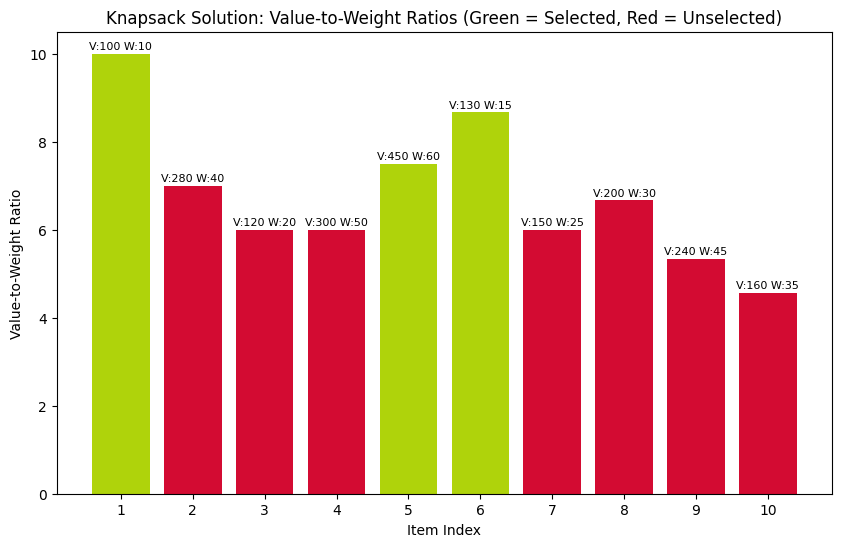

In [3]:
import matplotlib.pyplot as plt

def solve_0_1knapsack_with_greedy(values, weights, max_weight, show_plot=True):
    """
    Solve the 0/1 Knapsack Problem using a greedy algorithm and plot the results.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - max_weight (float): Maximum weight capacity of the knapsack.
    - show_plot (bool): If True, displays a bar plot of selected and unselected items.
    """
    # Calculate the value-to-weight ratios and sort items by this ratio in descending order
    items = sorted(
        [(i, values[i], weights[i], values[i] / weights[i]) for i in range(len(values))],
        key=lambda x: x[3],
        reverse=True
    )

    total_value = 0
    total_weight = 0
    selected_items = []

    # Print item ratios
    print("Item | Value | Weight | Value-to-Weight Ratio")
    print("-----------------------------------------------")
    for i, value, weight, ratio in items:
        print(f"{i+1:>4} | {value:>5} | {weight:>6} | {ratio:.2f}")

    # Select items based on greedy criteria
    for i, value, weight, ratio in items:
        if total_weight + weight <= max_weight:
            selected_items.append(i + 1)  # +1 for 1-based index
            total_value += value
            total_weight += weight

    print("\nTotal Value of Selected Items:", total_value, "\n")
    print("Total Weight of Selected Items:", total_weight, "\n")
    print("Selected Items:", selected_items, "\n")

    # Plot the results if show_plot is set to True
    if show_plot:
        plot_knapsack_solution(values, weights, selected_items)

def plot_knapsack_solution(values, weights, selected_items):
    """
    Plots the selected and unselected items in the knapsack problem, showing value-to-weight ratios.

    Parameters:
    - values (list of floats): List of item values.
    - weights (list of floats): List of item weights.
    - selected_items (list of int): Indices of selected items.
    """
    n = len(values)
    item_indices = list(range(1, n + 1))  # Start items from index 1

    # Calculate value-to-weight ratios
    ratios = [values[i] / weights[i] for i in range(n)]

    # Define colors for selected vs. unselected items
    colors = ['#afd30b' if (i + 1) in selected_items else '#d30b32' for i in range(n)]

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the value-to-weight ratio
    ax.bar(item_indices, ratios, color=colors)
    ax.set_xticks(item_indices)  # Ensure x-axis has sequential indices (1, 2, 3, ...)
    ax.set_xlabel("Item Index")
    ax.set_ylabel("Value-to-Weight Ratio", color='black')
    ax.set_title("Knapsack Solution: Value-to-Weight Ratios (Green = Selected, Red = Unselected)")

    # Display value and weight on each bar
    for i in range(n):
        ax.text(item_indices[i], ratios[i] + 0.1, f"V:{values[i]} W:{weights[i]}", ha='center', fontsize=8)

    plt.show()

# Example usage
if __name__ == "__main__":
    values = [100, 280, 120, 300, 450, 130, 150, 200, 240, 160]
    weights = [10, 40, 20, 50, 60, 15, 25, 30, 45, 35]
    max_weight = 100

    solve_0_1knapsack_with_greedy(values, weights, max_weight, show_plot=True)